# Project Notebook v2

# Notes
    * Need to figure out how to rename empty cells for parents
    * Need to combine disc buy and digital buy into just total buy for numbers and percents
    * Need to figure out how to split a groupby over more than one line
    * Need to figure out how to use compound logic/conditions in a groupby

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
# loads in csv
dtt = pd.read_csv("Data\DTT Final Data w labels.csv",index_col=0)
dtt.head()

,Gender,Age,Age_Breaks,Region2,Race,Language_Dominance,Parent,HH_Income,Employment,Education,...,Rented_Digital_iVOD,Rented_Digital_sVOD,Rented_Digital_cVOD,cqhidGroup,filter_$,ZTotal_Paid_HE_Movies,Buy_Disc_Percent,Buy_Digital_Percent,Rent_Disc_Percent,Rent_Digital_Percent
respid,,,,,,,,,,,,,,,,,,,,,
44,Female,20,18-24,South,Black,,,1 - < $20K,4 - Not employed,2 - HS Grad,...,5,18,4,Gen-Pop,Selected,1.492690,0.363636,0.0,0.145455,0.490909
108,Male,31,25-34,Northeast,Hispanic,Only English,No,1 - < $20K,4 - Not employed,2 - HS Grad,...,0,0,0,Gen-Pop,Selected,0.009386,0.157895,0.0,0.842105,0.000000
147,Female,19,18-24,South,White,,,1 - < $20K,4 - Not employed,2 - HS Grad,...,0,5,0,Gen-Pop,Selected,-0.567454,0.000000,0.0,0.000000,1.000000
171,Female,18,18-24,Northeast,White,,,1 - < $20K,2 - Part time,3 - Some coll,...,0,7,0,Gen-Pop,Selected,-0.485048,0.000000,0.0,0.000000,1.000000
174,Female,54,45-54,South,White,,No,1 - < $20K,4 - Not employed,2 - HS Grad,...,0,50,0,Gen-Pop,Selected,1.286676,0.000000,0.0,0.000000,1.000000


In [3]:
#Calculates all rollups and adds as columns

#total movies bought on disc
dtt['Total Discs Bought'] = (dtt['Bought_Disc_BD'] + dtt['Bought_Disc_DVD'])

#total movies rented on disc
dtt['Total Discs Rented'] = (dtt['Rented_Disc_Kiosk'] + dtt['Rented_Disc_Mail'] + dtt['Rented_Disc_Store'])

#total movies rented on digital
dtt['Total Digital Rented'] = (dtt['Rented_Digital_cVOD'] + dtt['Rented_Digital_iVOD'] + dtt['Rented_Digital_sVOD'])

#total movies purchased
dtt['Total Bought'] = (dtt['Bought_Disc_BD'] + dtt['Bought_Disc_DVD'] + dtt['Bought_Digital'])

#total movies purchased as percent of total
dtt['Buy_percent'] = dtt['Total Bought'].astype(float) / dtt['Total_Paid_HE_Movies']

In [ ]:
dtt.describe().T

In [ ]:
for x in dtt.columns.values:
    print x

# Getting Dummies

## Gender

In [4]:
dGender = pd.get_dummies(dtt.Gender, prefix='Gender', drop_first = True)
dGender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 1 columns):
Gender_Male    1925 non-null uint8
dtypes: uint8(1)
memory usage: 16.9 KB


## Age_Breaks

In [5]:
dAge_Breaks = pd.get_dummies(dtt.Age_Breaks, prefix = 'Age', drop_first= True)
dAge_Breaks.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 6 columns):
Age_18-24    1925 non-null uint8
Age_25-34    1925 non-null uint8
Age_35-44    1925 non-null uint8
Age_45-54    1925 non-null uint8
Age_55-64    1925 non-null uint8
Age_65-74    1925 non-null uint8
dtypes: uint8(6)
memory usage: 26.3 KB


## Race

In [6]:
dRace = pd.get_dummies(dtt.Race, prefix = 'Race',drop_first=True)
dRace.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 4 columns):
Race_Black       1925 non-null uint8
Race_Hispanic    1925 non-null uint8
Race_Other       1925 non-null uint8
Race_White       1925 non-null uint8
dtypes: uint8(4)
memory usage: 22.6 KB


## Region

In [7]:
dRegion = pd.get_dummies(dtt.Region2,prefix='Region', drop_first=True)
dRegion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 3 columns):
Region_Northeast    1925 non-null uint8
Region_South        1925 non-null uint8
Region_West         1925 non-null uint8
dtypes: uint8(3)
memory usage: 20.7 KB


## Parent

In [9]:
dParent = pd.get_dummies(dtt.Parent,prefix='Parent',drop_first=True)
dParent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 2 columns):
Parent_No     1925 non-null uint8
Parent_Yes    1925 non-null uint8
dtypes: uint8(2)
memory usage: 18.8 KB


## Income

In [10]:
dHH_Income = pd.get_dummies(dtt.HH_Income,prefix='Income',drop_first=True)
dHH_Income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 9 columns):
Income_2 - $20 to $29K         1925 non-null uint8
Income_3 - $30 to $39K         1925 non-null uint8
Income_4 - $40 to $59K         1925 non-null uint8
Income_5 - $60 to $74K         1925 non-null uint8
Income_6 - $75 to $99K         1925 non-null uint8
Income_7 - $100 to $149K       1925 non-null uint8
Income_8 - $150 to $199K       1925 non-null uint8
Income_9 - $200K+              1925 non-null uint8
Income_Prefer not to answer    1925 non-null uint8
dtypes: uint8(9)
memory usage: 32.0 KB


## Employment

In [12]:
dEmployment = pd.get_dummies(dtt.Employment,prefix='Employment', drop_first=True)
dEmployment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 3 columns):
Employment_2 - Part time       1925 non-null uint8
Employment_3 - Retired         1925 non-null uint8
Employment_4 - Not employed    1925 non-null uint8
dtypes: uint8(3)
memory usage: 20.7 KB


## Education

In [13]:
dEducation = pd.get_dummies(dtt.Education,prefix='Education', drop_first=True)
dEducation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 6 columns):
Education_2 - HS Grad                 1925 non-null uint8
Education_3 - Some coll               1925 non-null uint8
Education_4 - Coll Grad               1925 non-null uint8
Education_5 - Some Post-grad          1925 non-null uint8
Education_6 - Post-grad               1925 non-null uint8
Education_7 - Prefer not to answer    1925 non-null uint8
dtypes: uint8(6)
memory usage: 26.3 KB


## Marital Status

In [14]:
dMarital_Status = pd.get_dummies(dtt.Marital_Status,prefix='Marital_Status', drop_first=True)
dMarital_Status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 3 columns):
Marital_Status_Married                 1925 non-null uint8
Marital_Status_Prefer not to answer    1925 non-null uint8
Marital_Status_Single                  1925 non-null uint8
dtypes: uint8(3)
memory usage: 20.7 KB


In [15]:
dtt = pd.concat([dtt, dGender, dAge_Breaks, dRace, dRegion, dParent, dHH_Income, dEmployment, 
                 dEducation, dMarital_Status], axis=1)

In [16]:
dtt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 70 columns):
Gender                                 1925 non-null object
Age                                    1925 non-null int64
Age_Breaks                             1925 non-null object
Region2                                1925 non-null object
Race                                   1925 non-null object
Language_Dominance                     1925 non-null object
Parent                                 1925 non-null object
HH_Income                              1925 non-null object
Employment                             1925 non-null object
Education                              1925 non-null object
Marital_Status                         1925 non-null object
Total_Paid_HE_Movies                   1925 non-null int64
Bought_Disc_DVD                        1925 non-null int64
Bought_Disc_BD                         1925 non-null int64
Bought_Digital                         1925 non-null in

## Model Building

In [17]:
from scipy import stats
import statsmodels.api as sm

from sklearn import feature_selection, linear_model

C:\Users\anne1\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))).astype(int))
    # keep the model
    return algo


### Creating Feature Sets

In [19]:
XGender = dtt[['Gender_Male']]

In [23]:
XAge_Breaks = dtt[['Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65-74']]

XAge = dtt[['Age']]

XRace = dtt[['Race_Black','Race_Hispanic','Race_Other','Race_White']]

XParent = dtt[['Parent_Yes']]

XRegion = dtt[['Region_Northeast', 'Region_South', 'Region_West']]


XIncome = dtt[['Income_2 - $20 to $29K', 'Income_3 - $30 to $39K',
               'Income_4 - $40 to $59K', 'Income_5 - $60 to $74K', 
               'Income_6 - $75 to $99K', 'Income_7 - $100 to $149K', 
               'Income_8 - $150 to $199K', 'Income_9 - $200K+', 'Income_Prefer not to answer']]

XEmpl = dtt[['Employment_2 - Part time', 
             'Employment_3 - Retired', 'Employment_4 - Not employed']]


XEdu = dtt[['Education_2 - HS Grad', 'Education_3 - Some coll', 
            'Education_4 - Coll Grad', 'Education_5 - Some Post-grad', 'Education_6 - Post-grad', 
            'Education_7 - Prefer not to answer']]


XMar = dtt[['Marital_Status_Married', 'Marital_Status_Single']]

XPercent = dtt[['Buy_percent', 'Rent_Disc_Percent', 'Rent_Digital_Percent']]

XMethod = dtt[['Total Bought', 'Total Discs Rented', 'Total Digital Rented']]

XAll_Age_Breaks = pd.concat([XGender, XAge_Breaks, XRace, XParent, XRegion, XIncome, XEmpl, 
                      XEdu, XMar, XPercent],axis=1)

XAll_Age = pd.concat([XGender, XAge, XRace, XParent, XRegion, XIncome, XEmpl, 
                      XEdu, XMar, XPercent],axis=1)

XAll_Age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 44 to 19417
Data columns (total 33 columns):
Gender_Male                           1925 non-null uint8
Age                                   1925 non-null int64
Race_Black                            1925 non-null uint8
Race_Hispanic                         1925 non-null uint8
Race_Other                            1925 non-null uint8
Race_White                            1925 non-null uint8
Parent_Yes                            1925 non-null uint8
Region_Northeast                      1925 non-null uint8
Region_South                          1925 non-null uint8
Region_West                           1925 non-null uint8
Income_2 - $20 to $29K                1925 non-null uint8
Income_3 - $30 to $39K                1925 non-null uint8
Income_4 - $40 to $59K                1925 non-null uint8
Income_5 - $60 to $74K                1925 non-null uint8
Income_6 - $75 to $99K                1925 non-null uint8
Income_7 - $100 to $1

### Using all (age_breaks)

In [24]:
XAll_Age_Breaks = sm.add_constant(XAll_Age_Breaks) # another way to add a constant row for an intercept
y = dtt['Total_Paid_HE_Movies']

model_all = sm.OLS(y, XAll_Age_Breaks)
results = model_all.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Total_Paid_HE_Movies   R-squared:                       0.096
Model:                              OLS   Adj. R-squared:                  0.078
Method:                   Least Squares   F-statistic:                     5.386
Date:                  Tue, 11 Jul 2017   Prob (F-statistic):           1.12e-22
Time:                          15:51:06   Log-Likelihood:                -8033.9
No. Observations:                  1925   AIC:                         1.614e+04
Df Residuals:                      1887   BIC:                         1.636e+04
Df Model:                            37                                         
Covariance Type:              nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

### Gender Alone

In [ ]:
XGender = sm.add_constant(XGender) # another way to add a constant row for an intercept
y = dtt['Total_Paid_HE_Movies']

model = sm.OLS(y, XGender)
results = model.fit()
print(results.summary())

### Age Breaks

In [ ]:
XAge_Breaks = sm.add_constant(XAge_Breaks) # another way to add a constant row for an intercept
y = dtt['Total_Paid_HE_Movies']

model = sm.OLS(y, XAge_Breaks)
results = model.fit()
print(results.summary())

### Age (continuous)

In [ ]:
XAge = sm.add_constant(XAge) # another way to add a constant row for an intercept
y = dtt['Total_Paid_HE_Movies']

model = sm.OLS(y, XAge)
results = model.fit()
print(results.summary())

### Race

In [ ]:
XRace = sm.add_constant(XRace) # another way to add a constant row for an intercept
y = dtt['Total_Paid_HE_Movies']

model = sm.OLS(y, XRace)
results = model.fit()
print(results.summary())

### Parent

In [ ]:
XParent = sm.add_constant(XParent) # another way to add a constant row for an intercept
y = dtt['Total_Paid_HE_Movies']

model = sm.OLS(y, XParent)
results = model.fit()
print(results.summary())

### Region

In [ ]:
XRegion = sm.add_constant(XRegion) # another way to add a constant row for an intercept
y = dtt['Total_Paid_HE_Movies']

model = sm.OLS(y, XRegion)
results = model.fit()
print(results.summary())

### Income

In [ ]:
XIncome = sm.add_constant(XIncome) # another way to add a constant row for an intercept
y = dtt['Total_Paid_HE_Movies']

model = sm.OLS(y, XIncome)
results = model.fit()
print(results.summary())

### Consumption as Percent

In [ ]:
XPercent = sm.add_constant(XPercent) # another way to add a constant row for an intercept
y = dtt['Total_Paid_HE_Movies']

model = sm.OLS(y, XPercent)
results = model.fit()
print(results.summary())

# Using Sci-Kit Learn

P Values: [             nan   1.01613262e-01   2.35910367e-01   1.20622756e-05
   1.26619074e-04   1.06806691e-01   8.62178923e-04   3.31624824e-04
   5.23092916e-01   6.59295549e-05   6.77632197e-01   1.34826775e-03
   5.88569078e-08   3.99968216e-01   1.65425363e-01   3.92120772e-01
   2.78978216e-01   4.91351147e-01   6.56180401e-01   2.69242386e-01
   3.21499251e-01   9.53315669e-02   6.65261372e-01   4.95005677e-01
   1.66031470e-01   2.75169711e-01   2.01694013e-03   3.42073268e-04
   4.58140773e-01   5.83616859e-01   5.79960202e-03   5.86413229e-01
   3.10808923e-01   2.74649211e-01   5.81241253e-02   4.65098188e-02
   2.98095961e-15   5.76916602e-01   1.11915493e-10]
Coefficients: [ 0.          0.60703604 -0.          2.6854628   2.14290116 -0.61166844
 -1.35231926 -2.66344471  0.          1.29122246  0.         -1.3089674
  2.07602841 -0.          0.60209167  0.04287327 -0.         -0.         -0.
  0.09552445  0.          0.         -0.          0.         -0.
 -1.14895572 -0

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

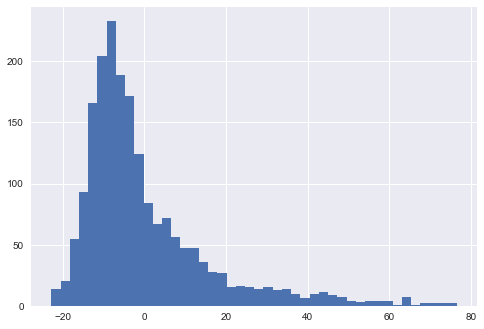

In [32]:
from sklearn import feature_selection, linear_model

from sklearn.model_selection import cross_val_score

model = linear_model.LassoCV()
model.fit(XAll_Age_Breaks,dtt['Total_Paid_HE_Movies'])

get_linear_model_metrics(XAll_Age_Breaks,dtt['Total_Paid_HE_Movies'],model)



In [ ]:
scores = cross_val_score(loan_model, X, y=result['FullyFunded'], groups=None, scoring='roc_auc', cv=5, 
                n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

print scores.mean()

In [ ]:
X = mammals[['bodywt']]
y = mammals['brainwt']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [ ]:
XAll = pd.concat([XGender, XAge_Breaks, XRace, XRegion, XIncome, Xempl, Xedu, Xmar, Xpercent, Xmethod],axis=1)
XAll.info()

In [ ]:
XAll.drop('const', axis=1)
XAll.info()

# Key Measures by Demographics

In [ ]:
Cons_Meas_wTot = ['Total_Paid_HE_Movies','Total Bought','Total Discs Rented',
                  'Total Digital Rented']

Cons_Meas_noTot = ['Total Bought','Total Discs Rented','Total Digital Rented']

### Consumption by Gender

In [ ]:
dtt.groupby(dtt.Gender)[Cons_Meas_wTot].mean()

In [ ]:
gby_gender = dtt.groupby(dtt.Gender)[Cons_Meas_noTot].mean()
gby_gender.plot(kind='bar',stacked=True,title = "Average Consumption by Gender")

In [ ]:
gby_gender = dtt.groupby(dtt.Gender)[Cons_Meas_noTot].mean()
gby_gender.plot(kind='bar',stacked=False,title = "Average Consumption by Gender")

### Consumption by Age Breaks

In [ ]:
dtt.groupby(dtt.Age_Breaks)[Cons_Meas_wTot].mean()

In [ ]:
gby_age = dtt.groupby(dtt.Age_Breaks)[Cons_Meas_noTot].mean()
gby_age.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Age')

In [ ]:
gby_age = dtt.groupby(dtt.Age_Breaks)[Cons_Meas_noTot].mean()
gby_age.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Age')

### Consumption by Race

In [ ]:
dtt.groupby(dtt.Race)[Cons_Meas_wTot].mean()

In [ ]:
gby_race = dtt.groupby(dtt.Race)[Cons_Meas_noTot].mean()
gby_race.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Race')

In [ ]:
gby_race = dtt.groupby(dtt.Race)[Cons_Meas_noTot].mean()
gby_race.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Race')

### Consumption by Employment Status

In [ ]:
dtt.groupby(dtt.Employment)[Cons_Meas_wTot].mean()

In [ ]:
gby_emply = dtt.groupby(dtt.Employment)[Cons_Meas_noTot].mean()
gby_emply.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Employment')

In [ ]:
gby_emply = dtt.groupby(dtt.Employment)[Cons_Meas_noTot].mean()
gby_emply.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Employment')

### Consumption by Education

In [ ]:
dtt.groupby(dtt.Education)[Cons_Meas_wTot].mean()

In [ ]:
gby_educ = dtt.groupby(dtt.Education)[Cons_Meas_noTot].mean()
gby_educ = gby_educ.drop(['7 - Prefer not to answer'])

gby_educ.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Education')

In [ ]:
gby_educ = dtt.groupby(dtt.Education)[Cons_Meas_noTot].mean()
gby_educ = gby_educ.drop(['7 - Prefer not to answer'])
gby_educ.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Education')

### Consumption by Marital Status

In [ ]:
dtt.groupby(dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_wTot].mean()

In [ ]:
dtt.groupby(dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_noTot].mean().plot(kind='bar',stacked = True)

In [ ]:
dtt.groupby(
    dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                                   stacked = False)

### Consumption by Parental status

In [ ]:
dtt.Parent.value_counts()

In [ ]:
dtt.Parent.unique()

In [ ]:
dtt.groupby(dtt.Parent [(dtt.Parent == "Yes") | (dtt.Parent == "No")])[Cons_Meas_wTot].mean()

In [ ]:
dtt.groupby(
    dtt.Parent[(dtt.Parent == 'Yes')|(dtt.Parent == 'No')])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                         title = 'Consumption by Parental Status', 
                                                                                         stacked = True)

In [ ]:
dtt.groupby(
    dtt.Parent[(dtt.Parent == 'Yes')|(dtt.Parent == 'No')])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                         title = 'Consumption by Parental Status', 
                                                                                         stacked = False)

### Consumption by Income (TO DO)

### Consumption Distributions

Probably need to combine disc and digital purchase into just purchase

In [ ]:
dtt_numbers = dtt[['Total_Paid_HE_Movies','Total Bought','Total Discs Rented',
      'Total Digital Rented','Buy_percent','Rent_Disc_Percent',
      'Rent_Digital_Percent']]

dtt_numbers.shape

In [ ]:
dtt_numbers.describe()

In [ ]:
print "Correlations across Consumption"
dtt_numbers[['Total_Paid_HE_Movies','Total Bought', 'Total Digital Rented','Total Discs Rented']].corr()



In [ ]:
corr = dtt_numbers[
    ['Total_Paid_HE_Movies','Total Bought',
     'Total Digital Rented','Total Discs Rented']].corr()

sns.heatmap(corr)

In [ ]:
dtt.Total_Paid_HE_Movies.plot(kind='hist', bins = 50, title = 'Total Paid HE Movies')

In [ ]:
dtt['Total Discs Bought'].plot(kind='hist', bins = 50, title = 'Total Discs Bought')

In [ ]:
dtt['Buy_Disc_Percent'].plot(kind='hist', bins = 50, title = 'Total Discs as % of Total')

In [ ]:
dtt['Bought_Digital'].plot(kind='hist', bins = 50, title = 'Total Digital Bought')

In [ ]:
dtt['Buy_Digital_Percent'].plot(kind='hist', bins = 50, title = 'Total Digital Purchases as % of Total')

In [ ]:
dtt['Total Discs Rented'].plot(kind='hist', bins = 50, title = 'Total Discs Rented')

In [ ]:
dtt['Rent_Disc_Percent'].plot(kind='hist', bins = 50, title = 'Total Disc Rental as % of Total')

In [ ]:
dtt['Total Digital Rented'].plot(kind='hist', bins = 50, title = 'Total Digital Rented')

In [ ]:
dtt['Rent_Digital_Percent'].plot(kind='hist', bins = 50, title = 'Total Digital Rental as % of Total')

In [ ]:
demos = ['Gender', 'Age_Breaks', 'Region2', 'Race', 'Parent', 'HH_Income', 'Employment', 'Education', 'Marital_Status']

sns.factorplot(data=dtt, x='Gender', y='Total_Paid_HE_Movies', hue=None)


# Model Building

In [ ]:
dtt.info()

In [ ]:
dtt.ZTotal_Paid_HE_Movies = dtt.ZTotal_Paid_HE_Movies.astype(float)
dtt.Buy_Disc_Percent = dtt.Buy_Disc_Percent.astype(float)
dtt.Buy_Digital_Percent = dtt.Buy_Digital_Percent.astype(float)
dtt.Rent_Disc_Percent = dtt.Rent_Disc_Percent.astype(float)
dtt.Rent_Digital_Percent = dtt.Rent_Digital_Percent.astype(float)
dtt.Buy_percent = dtt.Buy_percent.astype(float)


In [ ]:
dtt.info()

In [ ]:
# setting all dummies

Dgender = pd.get_dummies(dtt.Gender, prefix='Gender', prefix_sep='_', dummy_na=False, 
                         columns=None, sparse=False, drop_first=False)

Dgender.head()

dtt = pd.concat([dtt, Dgender], axis=1)

dtt.head()


In [ ]:
# from sklearn import linear_model

X = dtt[['Gender', 'Age', 'Age_Breaks', 'Region2', 'Race', 'Parent',
         'HH_Income', 'Employment', 'Education', 'Marital_Status', 
         'Total Discs Rented', 'Total Digital Rented', 'Total Bought', 
         'Rent_Disc_Percent', 'Rent_Digital_Percent', 'Buy_percent']]

X.info()

y = dtt['Total_Paid_HE_Movies']

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print results.intercept_, results.coef_